In [1]:
redshift = 0

In [2]:
import os
def main():
    
    print("Current Working Directory " , os.getcwd())
    
    
    try:
        # Change the current working Directory    
        os.chdir("D:\Harvard_Banneker_Summer_2020\Documents")
        print("Directory changed")
    except OSError:
        print("Can't change the Current Working Directory")        
    print("Current Working Directory " , os.getcwd())
    
    # Check if New path exists
    if os.path.exists("D:\Harvard_Banneker_Summer_2020\Documents") :
        # Change the current working Directory    
        os.chdir("D:\Harvard_Banneker_Summer_2020\Documents")
    else:
        print("Can't change the Current Working Directory")    
        
    
    print("Current Working Directory " , os.getcwd())
    
if __name__ == '__main__':
    main()

Current Working Directory  C:\Users\debos\Documents
Directory changed
Current Working Directory  D:\Harvard_Banneker_Summer_2020\Documents
Current Working Directory  D:\Harvard_Banneker_Summer_2020\Documents


In [3]:
from simulation_data import get
from simulation_data.galaxies import GalaxyPopulation
my_galaxy_population = GalaxyPopulation()
import numpy as np
import matplotlib.pyplot as plt
from simulation_data.galaxies.galaxy import age_profile, get_star_formation_history, get_galaxy_particle_data, metallicity_profile

In [4]:
ids = my_galaxy_population.select_galaxies(redshift=redshift, mass_min=10.5, mass_max=12)

import h5py
from pathlib import Path
if Path('galaxy_population_data_'+str(redshift)+'.hdf5').is_file():
    pass
else:
    with h5py.File('galaxy_population_data_'+str(redshift)+'.hdf5', 'w') as f:
        #writing data
        d1 = f.create_dataset('ids', data = my_galaxy_population.select_galaxies(redshift=redshift, mass_min=10.5, mass_max=12))
        d2 = f.create_dataset('mean_age', data = my_galaxy_population.get_mean_stellar_age())
        d3 = f.create_dataset('median_age', data = my_galaxy_population.get_median_stellar_age())
        d4 = f.create_dataset('current_SFR', data = my_galaxy_population.get_timeaverage_stellar_formation_rate(timescale=0))
        d5 = f.create_dataset('average_SFR_0.5', data = my_galaxy_population.get_timeaverage_stellar_formation_rate(timescale=0.5))
        d6 = f.create_dataset('average_SFR_1', data = my_galaxy_population.get_timeaverage_stellar_formation_rate(timescale=1))
        d7 = f.create_dataset('average_SFR_2', data = my_galaxy_population.get_timeaverage_stellar_formation_rate(timescale=2))
        d8 = f.create_dataset('SFR_ratio_1', data = my_galaxy_population.get_stellar_formation_rate_ratio(timescale=1))
        d9 = f.create_dataset('SFR_ratio_0.5', data = my_galaxy_population.get_stellar_formation_rate_ratio(timescale=0.5))
        d10 = f.create_dataset('effective_radius', data = my_galaxy_population.get_effective_radius())
        d11 = f.create_dataset('halfmass_radius', data = my_galaxy_population.get_halfmass_rad_stars())
        d12 = f.create_dataset('mean_metallicity', data = my_galaxy_population.get_mean_stellar_metallicity())
        d13 = f.create_dataset('total_mass', data = my_galaxy_population.get_total_stellar_mass())
with h5py.File('galaxy_population_data_'+str(redshift)+'.hdf5', 'r') as f:
    ids = f['ids'][:]
    mean_age = f['mean_age'][:]
    median_age = f['median_age'][:]
    current_SFR = f['current_SFR'][:] 
    average_SFR_0_5 = f['average_SFR_0.5'][:]
    average_SFR_1 = f['average_SFR_1'][:]
    average_SFR_2 = f['average_SFR_2'][:]
    SFR_ratio_1 = f['SFR_ratio_1'][:]
    SFR_ratio_0_5 = f['SFR_ratio_0.5'][:]
    effective_radius = f['effective_radius'][:]
    halfmass_radius = f['halfmass_radius'][:]
    mean_metallicity = f['mean_metallicity'][:]
    total_mass = f['total_mass'][:]

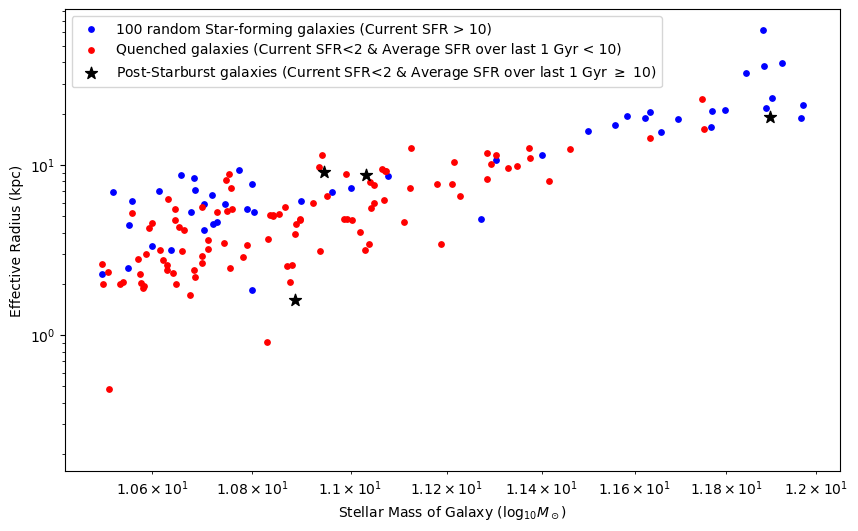

In [6]:
plt.style.use('default')
plt.figure(figsize=(10,6)) # 10 is width, 7 is height
plt.scatter((total_mass[current_SFR>10][:100]), effective_radius[current_SFR>10][:100], c='b', s=15, label='100 random Star-forming galaxies (Current SFR > 10)')
plt.scatter((total_mass[(current_SFR<2)&(average_SFR_1<10)])[:100], effective_radius[(current_SFR<2)&(average_SFR_1<10)][:100], c='r', s=15, label='Quenched galaxies (Current SFR<2 & Average SFR over last 1 Gyr < 10)')
plt.scatter((total_mass[(current_SFR<2)&(average_SFR_1>=10)]), effective_radius[(current_SFR<2)&(average_SFR_1>=10)], c='k', s=80, marker='*', label='Post-Starburst galaxies (Current SFR<2 & Average SFR over last 1 Gyr $\geq$ 10)')
#plt.xlim(0.5, 1e1)
#plt.ylim(0.5, 30)
#plt.grid()
plt.ticklabel_format(style='plain', useOffset=False, axis='both')
plt.legend()
#plt.colorbar(label = '$\log_{10}$ (Average SFR over last Gyr)')
#plt.title('Effective Radius (kpc) vs Stellar Mass ($\log_{10} M_\odot$)')
plt.xlabel('Stellar Mass of Galaxy ($\log_{10} M_\odot$)')
plt.ylabel('Effective Radius (kpc)')
plt.xscale('log')
plt.yscale('log')

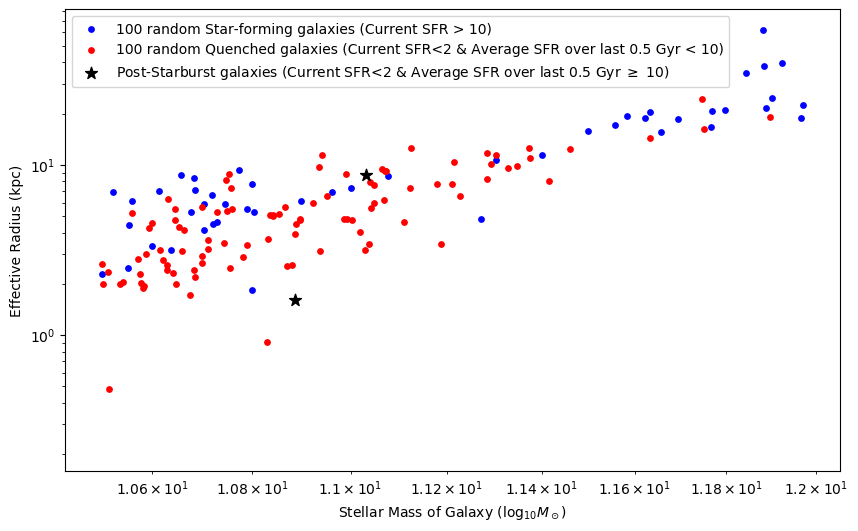

In [8]:
plt.style.use('default')
plt.figure(figsize=(10,6)) # 10 is width, 7 is height
plt.scatter(total_mass[current_SFR>10][:100], effective_radius[current_SFR>10][:100], c='b', s=15, label='100 random Star-forming galaxies (Current SFR > 10)')
plt.scatter(total_mass[(current_SFR<2)&(average_SFR_0_5<10)][:100], effective_radius[(current_SFR<2)&(average_SFR_0_5<10)][:100], c='r', s=15, label='100 random Quenched galaxies (Current SFR<2 & Average SFR over last 0.5 Gyr < 10)')
plt.scatter(total_mass[(current_SFR<2)&(average_SFR_0_5>=10)], effective_radius[(current_SFR<2)&(average_SFR_0_5>=10)], c='k', s=80, marker='*', label='Post-Starburst galaxies (Current SFR<2 & Average SFR over last 0.5 Gyr $\geq$ 10)')
#plt.xlim(0.5, 1e1)
#plt.ylim(0.5, 30)
#plt.grid()
plt.legend()
#plt.colorbar(label = '$\log_{10}$ (Average SFR over last Gyr)')
#plt.title('Effective Radius (kpc) vs Stellar Mass ($\log_{10} M_\odot$)')
plt.xlabel('Stellar Mass of Galaxy ($\log_{10} M_\odot$)')
plt.ylabel('Effective Radius (kpc)')
plt.xscale('log')
plt.yscale('log')

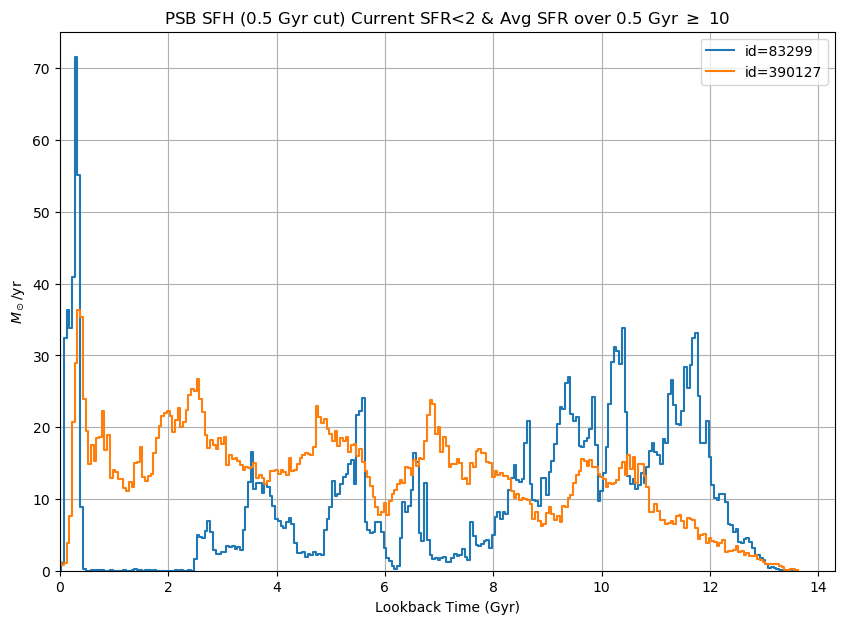

In [9]:
plt.style.use('default')
plt.figure(figsize=(10,7))
for id in ids[(current_SFR<2)&(average_SFR_0_5>=10)]:
    plt.step(get_star_formation_history(id=id, redshift=redshift, plot=False, binwidth=0.05)[0], get_star_formation_history(id=id, redshift=redshift, plot=False, binwidth=0.05)[1], label='id='+str(id))      
plt.title('PSB SFH (0.5 Gyr cut) Current SFR<2 & Avg SFR over 0.5 Gyr $\geq$ 10')
plt.legend()
plt.xlim(0, )
plt.ylim(0, )
plt.grid()
plt.xlabel("Lookback Time (Gyr)")
plt.ylabel("$M_\odot$/yr")
plt.show()

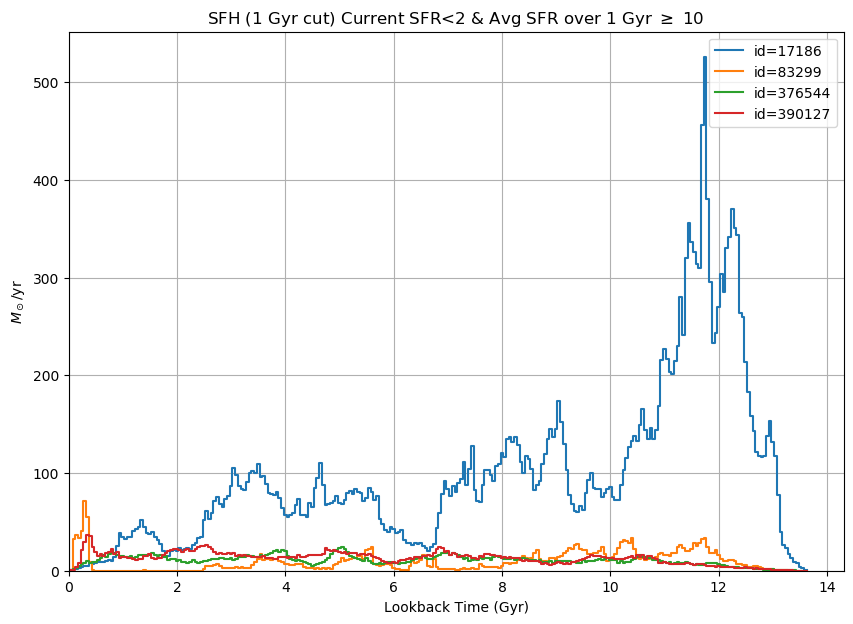

In [10]:
plt.style.use('default')
plt.figure(figsize=(10,7))
for id in ids[(current_SFR<2)&(average_SFR_1>=10)]:
    plt.step(get_star_formation_history(id=id, redshift=redshift, plot=False, binwidth=0.05)[0], get_star_formation_history(id=id, redshift=redshift, plot=False, binwidth=0.05)[1], label='id='+str(id))      
plt.title('SFH (1 Gyr cut) Current SFR<2 & Avg SFR over 1 Gyr $\geq$ 10')
plt.legend()
plt.xlim(0, )
plt.ylim(0, )
plt.grid()
plt.xlabel("Lookback Time (Gyr)")
plt.ylabel("$M_\odot$/yr")
plt.show()

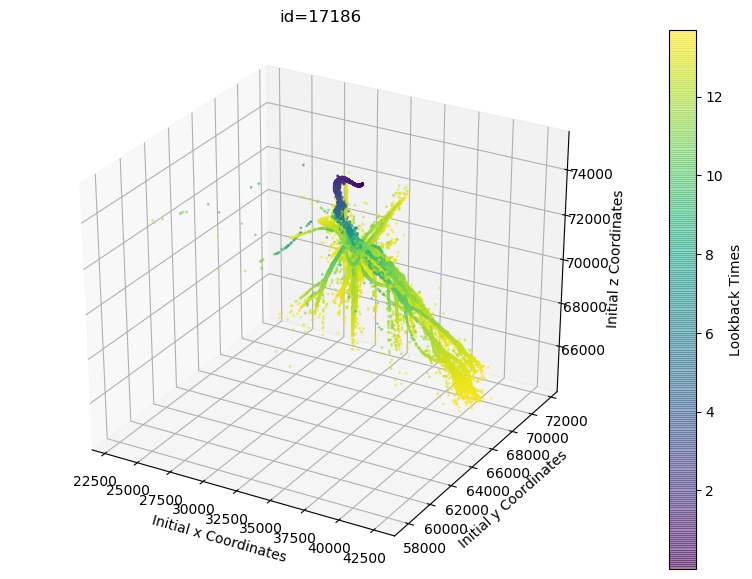

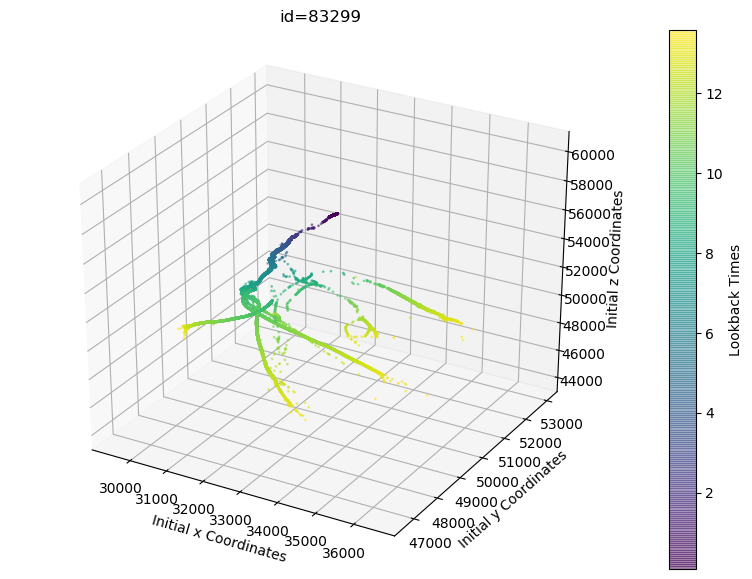

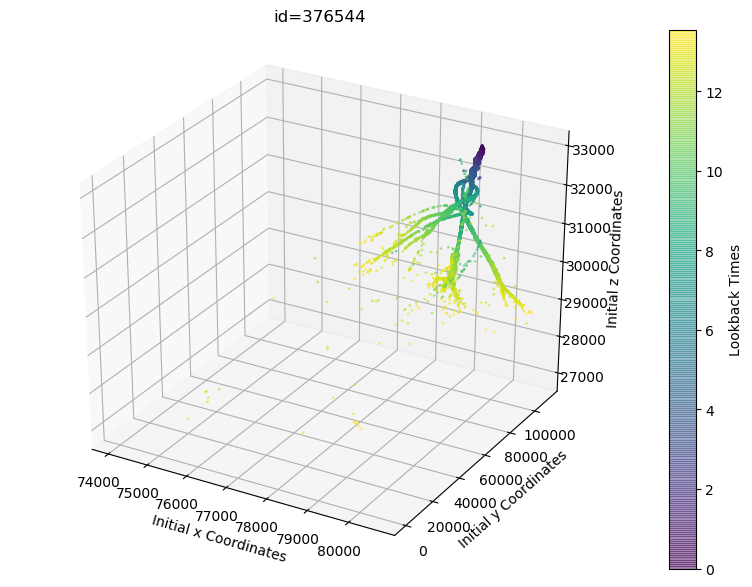

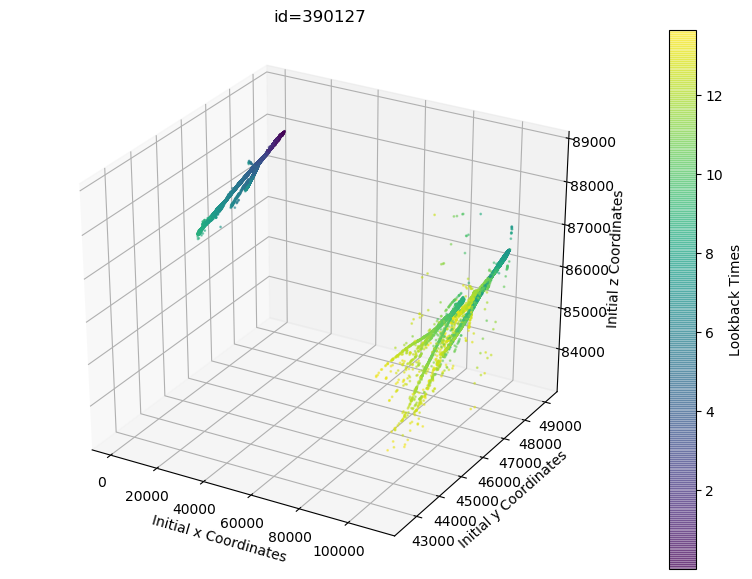

In [15]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

for id in ids[(current_SFR<2)&(average_SFR_1>=10)]: #extreme PSB cut#
    fig = plt.figure(figsize=(10,7))
    ax = fig.add_subplot(111, projection='3d')

    x = get_galaxy_particle_data(id=id, redshift=redshift, populate_dict=True)['initial_x_coordinates']
    y = get_galaxy_particle_data(id=id, redshift=redshift, populate_dict=True)['initial_y_coordinates']
    z = get_galaxy_particle_data(id=id, redshift=redshift, populate_dict=True)['initial_z_coordinates']
    ax.title.set_text('id='+str(id))
    p = ax.scatter(x, y, z, s=1, c=get_galaxy_particle_data(id=id, redshift=redshift, populate_dict=True)['LookbackTime'], alpha=0.5)
    fig.colorbar(p, label='Lookback Times')
    ax.set_xlabel('Initial x Coordinates')
    ax.set_ylabel('Initial y Coordinates')
    ax.set_zlabel('Initial z Coordinates')

    plt.show()

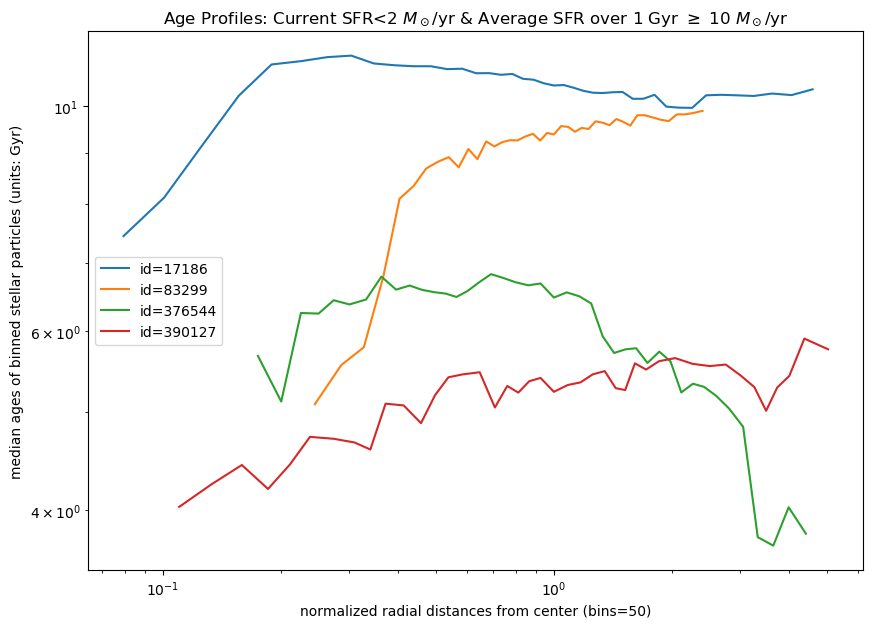

In [12]:
plt.figure(figsize=(10,7))
for id in ids[(current_SFR<2)&(average_SFR_1>=10)]:
    plt.plot(age_profile(id=id, redshift=redshift, n_bins=50)[1][4:-4], age_profile(id=id, redshift=redshift, n_bins=50)[0][4:-4], label='id='+str(id))
plt.legend()
#plt.grid()    
plt.title('Age Profiles: Current SFR<2 $M_\odot$/yr & Average SFR over 1 Gyr $\geq$ 10 $M_\odot$/yr')
plt.xlabel('normalized radial distances from center (bins=50)')
plt.ylabel('median ages of binned stellar particles (units: Gyr)')
plt.xscale('log')
plt.yscale('log')

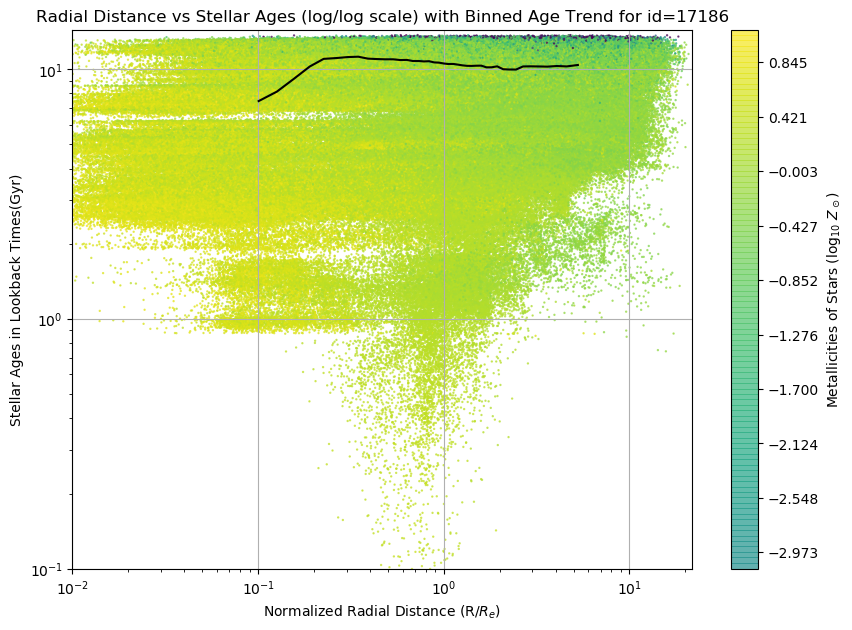

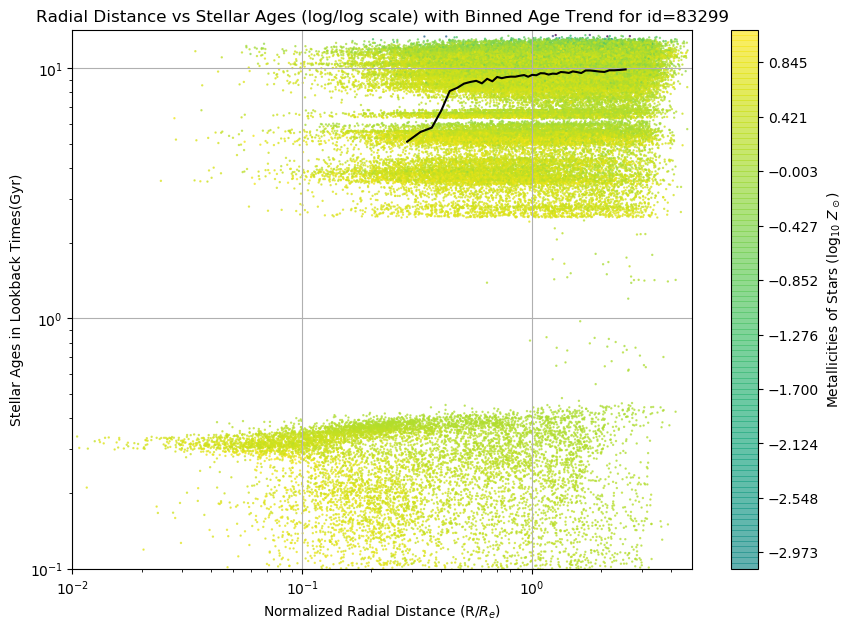

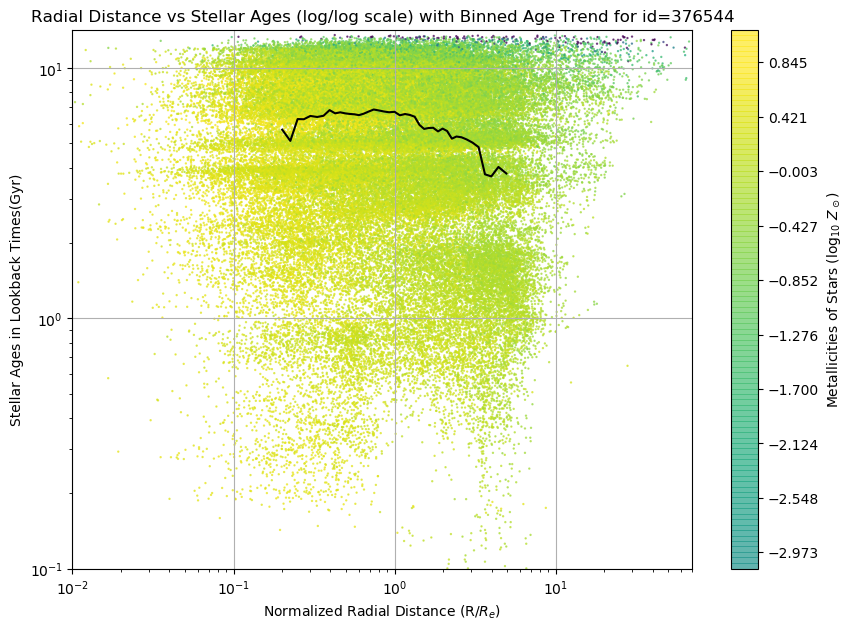

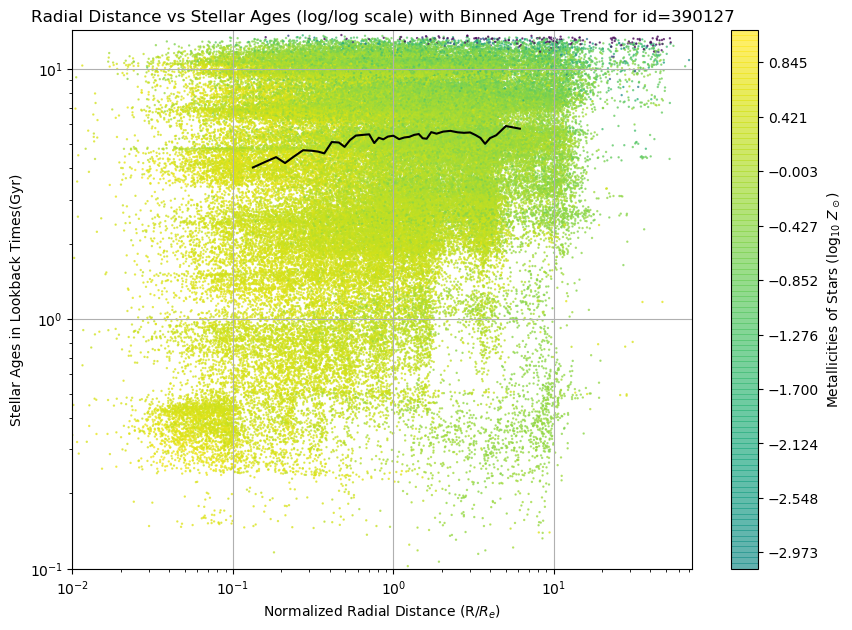

In [16]:
#post starburst galaxies
for id in ids[(current_SFR<2)&(average_SFR_1>=10)]:
    age_profile(id=id, redshift=redshift, n_bins=50, scatter=True)

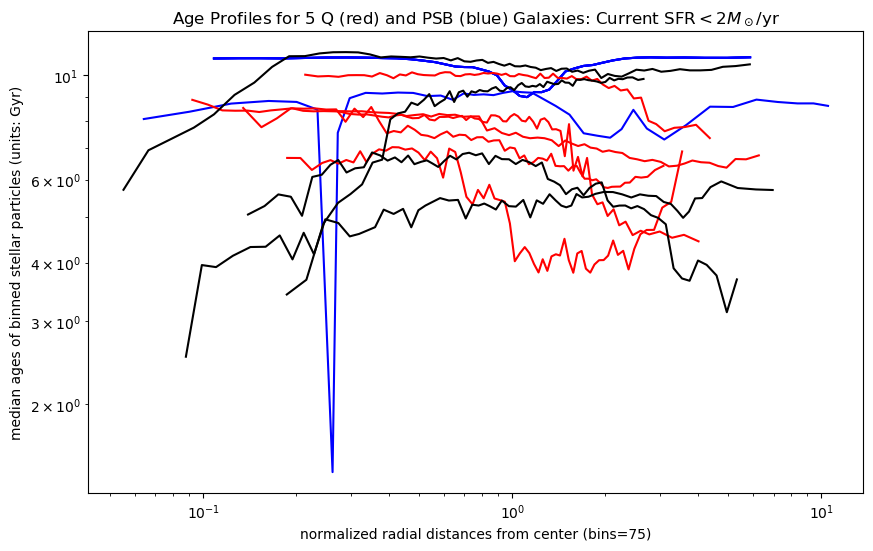

In [20]:
selection_Q = ids[(current_SFR<2)&(average_SFR_1<10)]
selection_PSB = ids[(current_SFR<2)&(average_SFR_1>=10)]
selection_SF = ids[(current_SFR>10)&(average_SFR_1>=30)]

plt.style.use('default')
plt.figure(figsize=(10,6))
for id in np.random.choice(selection_SF, 5):
    plt.plot(age_profile(id=id, redshift=redshift, n_bins=50)[1][4:-4], age_profile(id=id, redshift=redshift, n_bins=50)[0][4:-4], c='b')
#label:Star Forming Galaxies(black: Current SFR  $> 2$ $M_\odot$/yr)
for id in np.random.choice(selection_Q, 5):
    plt.plot(age_profile(id=id, redshift=redshift, n_bins=75)[1][4:-4], age_profile(id=id, redshift=redshift, n_bins=75)[0][4:-4], c='r')
#label:Slowly Quenched Galaxies(red: Average SFR over last $0.5$ Gyr $< 50$ $M_\odot$/yr)
for id in selection_PSB:
    plt.plot(age_profile(id=id, redshift=redshift, n_bins=75)[1][4:-4], age_profile(id=id, redshift=redshift, n_bins=75)[0][4:-4], c='k')    
#label:Rapidly Quenched Galaxies(blue: Average SFR over last $0.5$ Gyr $\geq 50$ $M_\odot$/yr)
#plt.legend()
#plt.grid()    
plt.title('Age Profiles for $5$ Q (red) and PSB (blue) Galaxies: Current SFR$<2 M_\odot$/yr')
plt.xlabel('normalized radial distances from center (bins=75)')
plt.ylabel('median ages of binned stellar particles (units: Gyr)')
plt.xscale('log')
plt.yscale('log') 

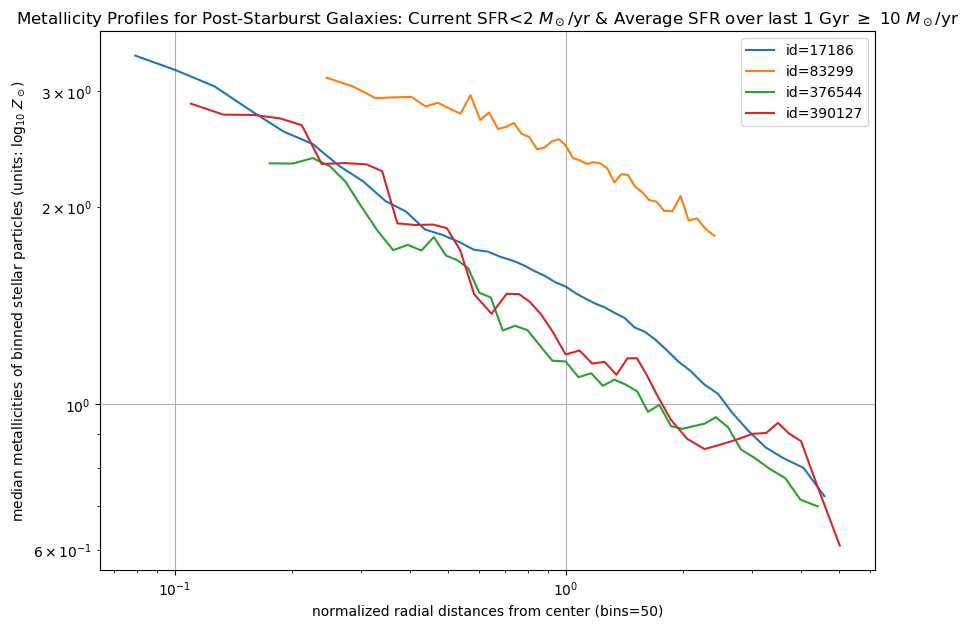

In [18]:
plt.figure(figsize=(10,7))
for id in ids[(current_SFR<2)&(average_SFR_1>=10)]:
    plt.plot(metallicity_profile(id=id, redshift=redshift, n_bins=50)[1][4:-4], metallicity_profile(id=id, redshift=redshift, n_bins=50)[0][4:-4], label='id='+str(id))
plt.legend()
plt.grid()    
plt.title('Metallicity Profiles for Post-Starburst Galaxies: Current SFR<2 $M_\odot$/yr & Average SFR over last 1 Gyr $\geq$ 10 $M_\odot$/yr')
plt.xlabel('normalized radial distances from center (bins=50)')
plt.ylabel('median metallicities of binned stellar particles (units: $\log_{10}$ $Z_\odot$)')
plt.xscale('log')
plt.yscale('log')

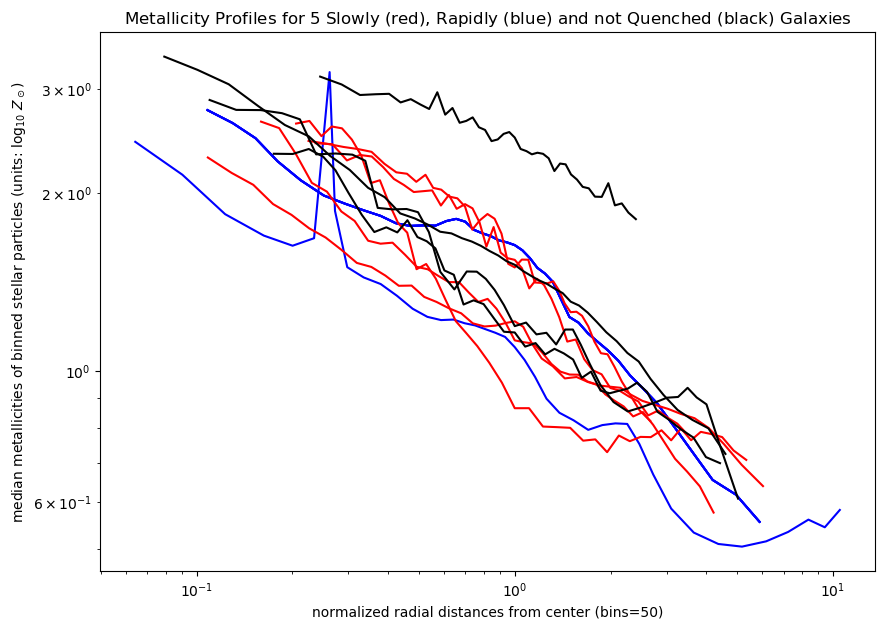

In [21]:
selection_Q = ids[(current_SFR<2)&(average_SFR_1<10)]
selection_PSB = ids[(current_SFR<2)&(average_SFR_1>=10)]
selection_SF = ids[(current_SFR>10)&(average_SFR_1>=30)]
plt.style.use('default')
plt.figure(figsize=(10,7))
for id in np.random.choice(selection_SF, 5):
    plt.plot(metallicity_profile(id=id, redshift=redshift, n_bins=50)[1][4:-4], metallicity_profile(id=id, redshift=redshift, n_bins=50)[0][4:-4], c='b')
#label:Star Forming Galaxies(black: Current SFR  $> 2$ $M_\odot$/yr)
for id in np.random.choice(selection_Q, 5):
    plt.plot(metallicity_profile(id=id, redshift=redshift, n_bins=50)[1][4:-4], metallicity_profile(id=id, redshift=redshift, n_bins=50)[0][4:-4], c='r')
#label:Slowly Quenched Galaxies(red: Average SFR over last $0.5$ Gyr $< 50$ $M_\odot$/yr)
for id in selection_PSB:
    plt.plot(metallicity_profile(id=id, redshift=redshift, n_bins=50)[1][4:-4], metallicity_profile(id=id, redshift=redshift, n_bins=50)[0][4:-4], c='k')    
#label:Rapidly Quenched Galaxies(blue: Average SFR over last $0.5$ Gyr $\geq 50$ $M_\odot$/yr)
#plt.legend()
#plt.grid()    
plt.title('Metallicity Profiles for $5$ Slowly (red), Rapidly (blue) and not Quenched (black) Galaxies')
plt.xlabel('normalized radial distances from center (bins=50)')
plt.ylabel('median metallicities of binned stellar particles (units: $\log_{10}$ $Z_\odot$)')
plt.xscale('log')
plt.yscale('log') 